In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path


In [2]:
#df_hourly_2022 = pd.read_csv("../data/energy_data/Gro_handelspreise_202211280000_202211292359_Stunde.csv", delimiter=';', decimal=',', parse_dates=[['Datum', 'Anfang']])
df_hourly_2022 = pd.read_csv("../data/energy_data/Gro_handelspreise_202212050000_202212062359_Stunde.csv", delimiter=';', decimal='.', parse_dates=['Datum'], dayfirst=True)
df_hourly_2022.dropna()
df_hourly_2022["Deutschland/Luxemburg [€/MWh] Originale Auflösungen"] = df_hourly_2022["Deutschland/Luxemburg [€/MWh] Originale Auflösungen"].str.replace(
    ",","."
)
df_hourly_2022["Deutschland/Luxemburg [€/MWh] Originale Auflösungen"] = pd.to_numeric(
    df_hourly_2022["Deutschland/Luxemburg [€/MWh] Originale Auflösungen"],
    downcast='integer'
    )
df_hourly_2022.head()

,Datum,Anfang,Ende,Deutschland/Luxemburg [€/MWh] Originale Auflösungen,∅ Anrainer DE/LU [€/MWh] Originale Auflösungen,Belgien [€/MWh] Originale Auflösungen,Dänemark 1 [€/MWh] Originale Auflösungen,Dänemark 2 [€/MWh] Originale Auflösungen,Frankreich [€/MWh] Originale Auflösungen,Niederlande [€/MWh] Originale Auflösungen,Norwegen 2 [€/MWh] Originale Auflösungen,Österreich [€/MWh] Originale Auflösungen,Polen [€/MWh] Originale Auflösungen,Schweden 4 [€/MWh] Originale Auflösungen,Schweiz [€/MWh] Originale Auflösungen,Tschechien [€/MWh] Originale Auflösungen,DE/AT/LU [€/MWh] Originale Auflösungen,Italien (Nord) [€/MWh] Originale Auflösungen,Slowenien [€/MWh] Originale Auflösungen,Ungarn [€/MWh] Originale Auflösungen
0,2022-12-05,00:00,01:00,205.16,"223,67","294,51","205,16","205,16","293,51",279,"211,72","194,73","159,96","205,16","287,62","123,79",-,"293,51","193,33","170,75"
1,2022-12-05,01:00,02:00,195.89,"215,21","275,53","195,89","191,19","295,01",299,"201,74","187,97","138,57","191,19","287,98","103,2",-,"295,01","187,33","158,25"
2,2022-12-05,02:00,03:00,183.22,"206,15","267,07","183,22","179,99","295,8",270,"188,69","181,14","133,79","179,99","283,92",104,-,"295,8","179,23","157,02"
3,2022-12-05,03:00,04:00,181.68,"195,62","249,94","181,68","177,32","268,6","256,8","187,49","175,78","133,17","177,32","239,8","103,97",-,"268,6","176,27","149,94"
4,2022-12-05,04:00,05:00,163.66,"203,59","314,43","163,66","163,66",290,"262,59","183,14","192,89","142,93","163,66","265,74","96,77",-,290,"187,7","159,48"


In [3]:
df_hourly_2021 = pd.read_csv("../data/energy_data/Gro_handelspreise_202112060000_202112072359_Stunde.csv", delimiter=';', decimal=',', parse_dates=['Datum'], dayfirst=True)
df_hourly_2021["Deutschland/Luxemburg [€/MWh] Originale Auflösungen"] = pd.to_numeric(
    df_hourly_2021["Deutschland/Luxemburg [€/MWh] Originale Auflösungen"],
    downcast='integer'
    )
df_hourly_2021.head()


,Datum,Anfang,Ende,Deutschland/Luxemburg [€/MWh] Originale Auflösungen,∅ Anrainer DE/LU [€/MWh] Originale Auflösungen,Belgien [€/MWh] Originale Auflösungen,Dänemark 1 [€/MWh] Originale Auflösungen,Dänemark 2 [€/MWh] Originale Auflösungen,Frankreich [€/MWh] Originale Auflösungen,Niederlande [€/MWh] Originale Auflösungen,Norwegen 2 [€/MWh] Originale Auflösungen,Österreich [€/MWh] Originale Auflösungen,Polen [€/MWh] Originale Auflösungen,Schweden 4 [€/MWh] Originale Auflösungen,Schweiz [€/MWh] Originale Auflösungen,Tschechien [€/MWh] Originale Auflösungen,DE/AT/LU [€/MWh] Originale Auflösungen,Italien (Nord) [€/MWh] Originale Auflösungen,Slowenien [€/MWh] Originale Auflösungen,Ungarn [€/MWh] Originale Auflösungen
0,2021-12-06,00:00,01:00,197.53,170.22,200.37,129.06,129.06,204.44,196.78,129.06,200.06,129.06,129.06,242.63,182.88,-,204.44,200.06,182.88
1,2021-12-06,01:00,02:00,182.57,164.89,192.84,126.91,126.91,207.56,180.00,126.91,191.74,126.91,126.91,228.13,178.94,-,207.56,191.74,178.94
2,2021-12-06,02:00,03:00,184.20,159.93,189.96,125.92,125.92,198.22,182.75,125.92,189.34,125.92,125.92,224.35,145.00,-,198.22,189.34,145.00
3,2021-12-06,03:00,04:00,174.12,155.38,179.47,129.48,129.48,187.15,172.78,129.48,178.90,129.48,129.48,213.45,130.00,-,187.15,178.90,130.00
4,2021-12-06,04:00,05:00,174.14,160.99,176.46,136.62,136.62,179.80,173.55,136.62,176.21,136.62,136.62,207.59,174.14,-,179.80,176.21,174.14


In [4]:
series_hourly_2022 = df_hourly_2022.iloc[:, [1,3]]
series_hourly_2022.columns = ["Uhrzeit", "Großmarktpreis [€/MWh]"]
series_hourly_2022.head()

,Uhrzeit,Großmarktpreis [€/MWh]
0,00:00,205.16
1,01:00,195.89
2,02:00,183.22
3,03:00,181.68
4,04:00,163.66


In [5]:
series_hourly_2022_day_one = series_hourly_2022.loc[0:23]
series_hourly_2022_day_one.tail()

,Uhrzeit,Großmarktpreis [€/MWh]
19,19:00,427.92
20,20:00,392.30
21,21:00,333.11
22,22:00,324.56
23,23:00,292.62


In [6]:
series_hourly_2021 = df_hourly_2021.iloc[:, [1,3]]
series_hourly_2021.columns = ["Uhrzeit", "Großmarktpreis [€/MWh]"]
series_hourly_2021.head()

,Uhrzeit,Großmarktpreis [€/MWh]
0,00:00,197.53
1,01:00,182.57
2,02:00,184.20
3,03:00,174.12
4,04:00,174.14


In [7]:
series_hourly_2021_day_one = series_hourly_2021.loc[0:23]
series_hourly_2021_day_one.tail()

,Uhrzeit,Großmarktpreis [€/MWh]
19,19:00,250.02
20,20:00,225.80
21,21:00,199.00
22,22:00,195.50
23,23:00,162.10


In [8]:
new_df = pd.DataFrame(series_hourly_2021["Uhrzeit"])
new_df["2021"] = series_hourly_2021_day_one["Großmarktpreis [€/MWh]"]
new_df["2022"] = series_hourly_2022_day_one["Großmarktpreis [€/MWh]"]
new_df_melted = new_df.melt(id_vars="Uhrzeit",value_name='price')
df = new_df_melted.dropna()
df.head()

,Uhrzeit,variable,price
0,00:00,2021,197.53
1,01:00,2021,182.57
2,02:00,2021,184.20
3,03:00,2021,174.12
4,04:00,2021,174.14


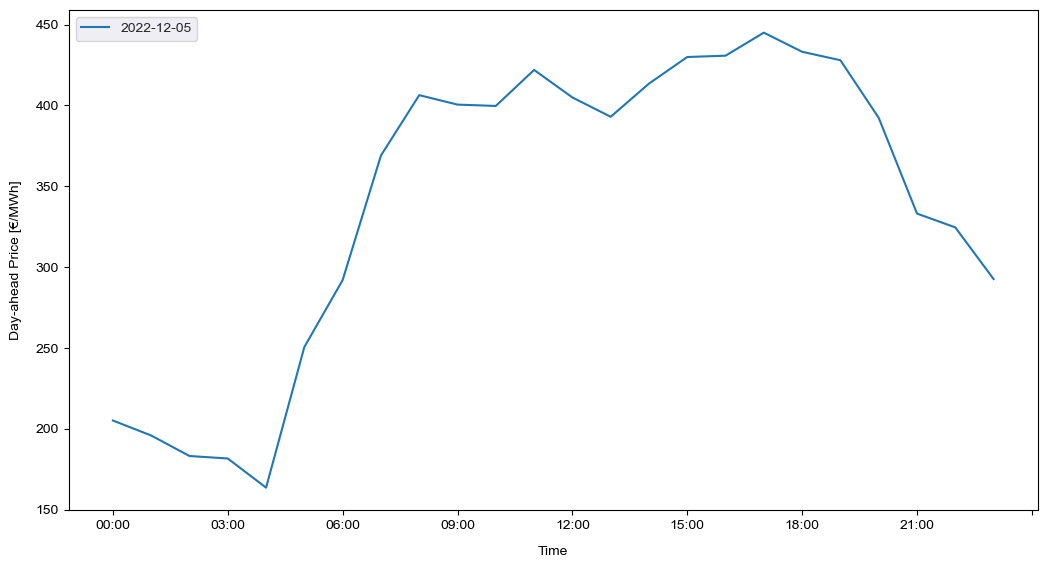

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)

fpath = Path("/Users/paul/Library/Fonts/Source_Sans_Pro/SourceSansPro-Regular.ttf")
#ax.set_title('Day-ahead Prices', font=fpath)
ax.set_xlabel('Time', labelpad=10)
ax.set_ylabel('Day-ahead Price [€/MWh]', labelpad=10)

sns.lineplot(
    data=series_hourly_2022,
     x="Uhrzeit", 
     y="Großmarktpreis [€/MWh]",
     estimator=None,
     )
sns.set_style("darkgrid")
#plt.plot(series_hourly_day_one)
plt.xticks(np.arange(0,25,3))
plt.legend(loc='upper left', labels=['2022-12-05'])
#plt.show()

In [22]:
from mpl_toolkits.axes_grid1 import host_subplot

consumption = [
    176,
    176,
    176,
    176,
    155,
    155,
    130,
    100,
    90,
    80,
    80,
    80,
    80,
    80,
    80,
    80,
    80,
    100,
    120,
    120,
    130,
    140,
    150,
    150
]

df = pd.DataFrame({"Time": series_hourly_2022_day_one["Uhrzeit"],
                   "Price": series_hourly_2022_day_one["Großmarktpreis [€/MWh]"], 
                   "Consumption": consumption})

df["Price"] = df["Price"].div(1000)

fig1 = plt.figure(figsize=(20.5, 9.5), dpi=600)

host = host_subplot(111)
par = host.twinx()

host.set_xlabel("Uhrzeit", labelpad=10, fontsize=14)
host.set_ylabel("Strompreis [€/kWh]", labelpad=10, fontsize=14)
par.set_ylabel("Energiebedarf [kW]", labelpad=10, fontsize=14)

p1, = host.plot(df["Time"], df["Price"], label="Strompreis [€/kWh]", color='#007749')
p2, = par.step(df["Time"], df["Consumption"], linestyle="dashed",label="Energiebedarf [kW]", color="#0E2356",)

host.legend(labelcolor="linecolor", fontsize=14)

host.yaxis.get_label().set_color(p1.get_color())
par.yaxis.get_label().set_color(p2.get_color())

SMALL_SIZE = 12
MEDIUM_SIZE = 14

plt.xticks(np.arange(0,25,3))
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
sns.set_style("darkgrid")

#host.grid(False)
#fig.patch.set_facecolor('white')
plt.show()


In [21]:
consumption = [
    176,
    176,
    176,
    176,
    155,
    155,
    130,
    100,
    90,
    80,
    80,
    80,
    80,
    80,
    80,
    80,
    80,
    100,
    120,
    120,
    130,
    140,
    150,
    150
]

df = pd.DataFrame({"Time": series_hourly_2022_day_one["Uhrzeit"],
                   "Price": series_hourly_2022_day_one["Großmarktpreis [€/MWh]"], 
                   "Consumption": consumption})

df["Price"] = df["Price"].div(1000)


fig, ax1 = plt.subplots(figsize=(20.5, 9.5), dpi=600)

ax1.plot(df["Time"], df["Price"], label="Strompreis [€/kWh]", color='#007749')
ax1.set_xlabel("Uhrzeit", labelpad=10, fontsize=14)
ax1.set_ylabel("Strompreis [€/kWh]", labelpad=10, fontsize=14)
#ax1.yaxis.get_label().set_color(ax1.get_color())

ax2 = ax1.twinx()
ax2.step(df["Time"], df["Consumption"], linestyle="dashed",label="Energiebedarf [kW]", color="#0E2356",)
#ax2.yaxis.get_label().set_color(ax2.get_color())

fig.legend(labelcolor="linecolor", fontsize=14)


SMALL_SIZE = 12
MEDIUM_SIZE = 14

plt.xticks(np.arange(0,25,3))
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
